In this kernel we will explore the dataset.Dataset has data for two years spanning 19 days in each month.Then we will predict the bike Count using Machine learning.This kernel is a work in process.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/test.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/sampleSubmission.csv


**Importing the Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
df=pd.read_csv('../input/bike-sharing-demand/train.csv',parse_dates=['datetime'],index_col=0)
df_test=pd.read_csv('../input/bike-sharing-demand/test.csv',parse_dates=['datetime'],index_col=0)
#df.head()

In [4]:
#df.info()

**Summary of Dataset**

In [5]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 10886
Columns  : 11

Features :
     : ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

Missing values    : 0

Unique values :  
 season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64


We have no missing values in the Dataset

**Converting to Datetime to Month,day,hour etc**

In [6]:
def add_feature(df):
    df['year']=df.index.year
    df['month']=df.index.month
    df['day']=df.index.day
    df['dayofweek']=df.index.dayofweek
    df['hour']=df.index.hour

In [7]:
add_feature(df)
add_feature(df_test)

In [8]:
df.tail(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,2,23


**Plot the count**

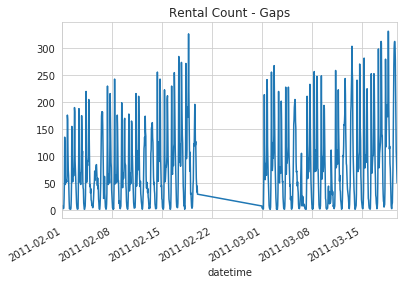

In [9]:
plt.title('Rental Count - Gaps')
df['2011-02':'2011-03']['count'].plot()
plt.show()

We can see that data is available for first 19 days of the week.Rest of the days of the month data is not available.

**Hourly Rental Change**

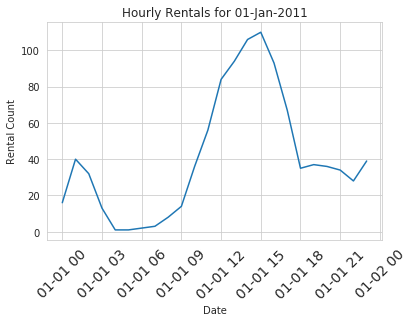

In [10]:
plt.plot(df['2011-01-01']['count'])
plt.xticks(fontsize=14,rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Hourly Rentals for 01-Jan-2011')
plt.show()

We can clearly see that the rental count is diiferent at different time of the day.

**Monthly Demand**

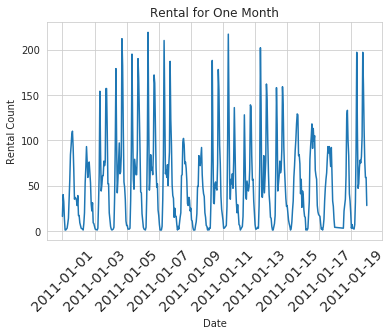

In [11]:
plt.plot(df['2011-01']['count'])
plt.xticks(fontsize=14,rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Rental for One Month')
plt.show()

So demand shows lot of seasonality in the data.Fewer rentals on weekends compared to weekdays.

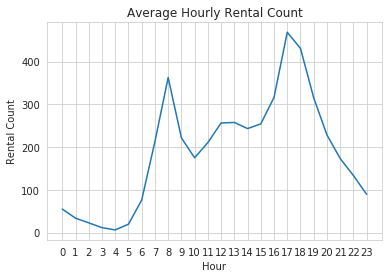

In [12]:
y=df.groupby('hour')['count'].mean()
plt.plot(y.index,y);
plt.xlabel('Hour')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24));
plt.grid(True)
plt.title('Average Hourly Rental Count')
plt.show()

So we can clearly see that the count increases at 8 am and 5 pm.This is possibly due to office timinings are 8 AM to 5 PM.

**Year to Year Trend**

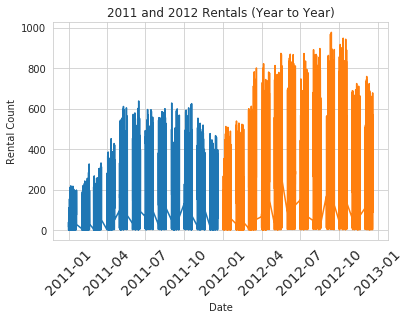

In [13]:
plt.plot(df['2011']['count'],label='2011')
plt.plot(df['2012']['count'],label='2012')
plt.xticks(fontsize=14,rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.show()

So we can see from the above plot year on year the ride count is increasing.

**How is ride count based on Month?**

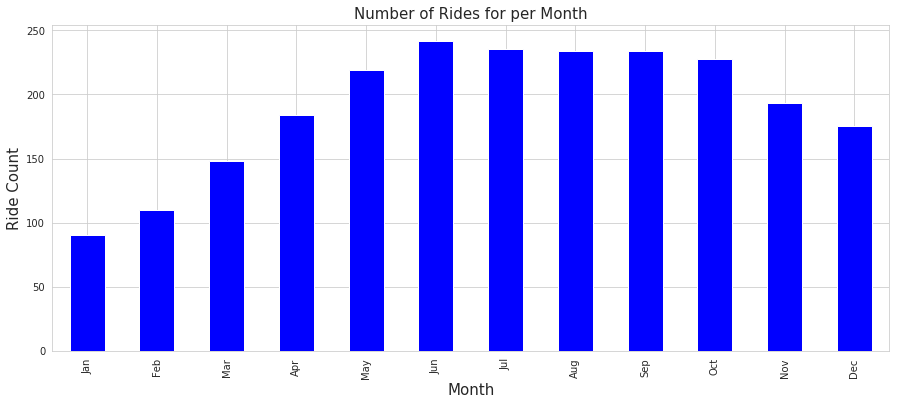

In [14]:
ax=df.groupby('month')['count'].mean().plot('bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Ride Count',fontsize=15)
ax.set_title('Number of Rides for per Month',fontsize=15)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.show()

We can see that the count of rides is more in May,Jun,Jul then steadly decreases in Nov and Dec.So more rides are happening in Summer months.In winter it will be difficult to do cycling.

**Rides Per Year**

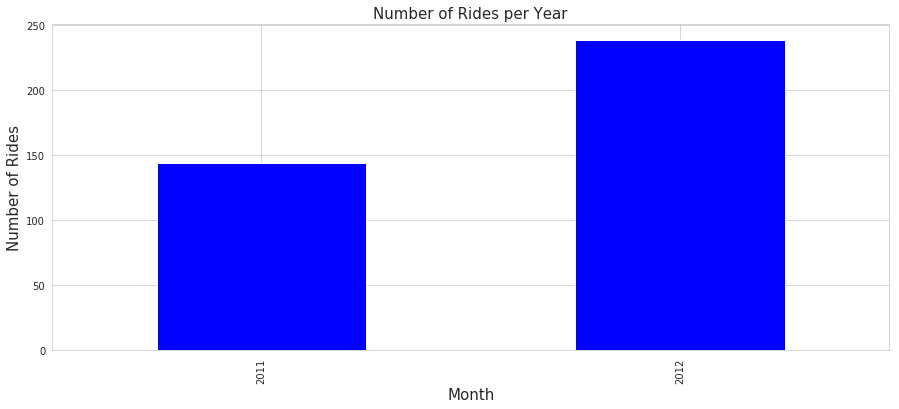

In [15]:
ax=df.groupby('year')['count'].mean().plot('bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Rides',fontsize=15)
ax.set_title('Number of Rides per Year',fontsize=15)
ax.set_xticklabels(('2011','2012'))
plt.show()

We have more rides in Year 2012